### During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .

### E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this notebook we will discuss about dimensionality reduction.We will be using Principle Component Analysis for this.After we manage to reduce the dimensions in our dataset then we will make use of the reduced dimensions for making our predictions.In this notebook we will be covering following things.

1.Data Import and Preprocessing 

2.Principle Component Analysis 

3.Logistic Regression 

4.Model Evaluation 

5.Vizualisation of Predictions 

6.Conclusion 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Wine.csv']


# 1.Data Import and Preprocessing 

### Importing Python Modules 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') 

### Importing dataset 

In [3]:
dataset=pd.read_csv('../input/Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.22,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
dataset['Customer_Segment'].unique()

array([1, 2, 3])

We can see that there are three type of Wine in the dataset

### Creating matrix of features

In [5]:
X=dataset.iloc[:,0:13].values
y=dataset.iloc[:,13].values

### Splitting data into test train

In [6]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 
#X_train

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

In [8]:
X_train.shape

(142, 13)

# 2.Principle Component Analysis  

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [10]:
explained_variance

array([0.36883694, 0.19318676, 0.10752874, 0.07422359, 0.06245953,
       0.04909043, 0.04117231, 0.02496185, 0.02308406, 0.01864039,
       0.01731583, 0.01253026, 0.00696931])

We see that the the first two principal components 0.36 +0.19 = 0.55 .So we will consider the first two components 

### Scores 

In [11]:
scores = X_train 
scores_df = pd.DataFrame(scores,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13',])
scores_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.178896,-1.072198,0.072569,0.084840,-1.100630,-0.506133,-1.021046,0.135308,0.459016,0.236721,0.127047,-0.078970,0.454252
1,-1.808149,1.578245,0.009001,-1.123472,-0.559235,1.160134,-0.409460,0.186894,0.004571,-0.154644,-0.960953,-0.404205,-0.340992


### Calling DataDrame Variables 

In [12]:
scores_df['PC1'].head(2)

0   -2.178896
1   -1.808149
Name: PC1, dtype: float64

### Labeling the Dataframe 

In [13]:
y_label = []

for i in y:
    if i == 1:
        y_label.append("Wine_1")
    elif i == 2:
        y_label.append("Wine_2")
    else:
        y_label.append("Wine_3")
        
Wines = pd.DataFrame(y_label,columns=['Wine'])
            

In [14]:
df_scores = pd.concat([scores_df,Wines],axis=1)
df_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Wine
0,-2.178896,-1.072198,0.072569,0.084840,-1.100630,-0.506133,-1.021046,0.135308,0.459016,0.236721,0.127047,-0.078970,0.454252,Wine_1
1,-1.808149,1.578245,0.009001,-1.123472,-0.559235,1.160134,-0.409460,0.186894,0.004571,-0.154644,-0.960953,-0.404205,-0.340992,Wine_1
2,1.098409,2.221279,-0.109337,0.649081,0.412448,-0.750730,0.799201,-0.535407,0.303469,1.085382,1.105097,0.106787,0.368950,Wine_1
3,-2.555898,-1.662072,-0.194677,0.240371,0.324685,-0.091796,-0.071887,0.471121,-0.378817,-0.032988,0.071062,-0.262926,0.249769,Wine_1
4,1.856990,0.241393,-1.002948,-0.509655,-0.497253,-0.893984,0.226841,0.142793,0.274745,-0.321855,-0.624414,0.407795,0.223198,Wine_1


In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [16]:
pca.explained_variance_ratio_

array([0.36883694, 0.19318676])

In [17]:
np.identity(X.shape[1])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [18]:
components=pca.transform(np.identity(X.shape[1]))

In [19]:
dataset.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [20]:
pd.DataFrame(components,columns=['pc_1','pc_2'],index=["Alcohol","Malic_Acid","Ash","Ash_Alcanity","Magnesium","Total_Phenols","Flavanoids","Nonflavanoid_Phenols","Proanthocyanins","Color_Intensity","Hue","OD280","Proline"])

,pc_1,pc_2
Alcohol,1.000000e+00,-6.254778e-17
Malic_Acid,6.567516e-17,1.000000e+00
Ash,6.567516e-17,8.937764e-17
Ash_Alcanity,6.567516e-17,-2.463091e-16
Magnesium,6.567516e-17,-3.295098e-17
Total_Phenols,6.567516e-17,-1.242192e-16
Flavanoids,6.567516e-17,1.046223e-16
Nonflavanoid_Phenols,6.567516e-17,1.198638e-16
Proanthocyanins,6.567516e-17,-7.658472e-17
Color_Intensity,6.567516e-17,-1.004815e-16


In [21]:
X_train.shape

(142, 2)

# 3.Logistic Regression 

In [22]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Predicting the test set results **

In [23]:
y_pred=classifier.predict(X_test)

# 4.Model Evaluation 

### Confusion Matrix 

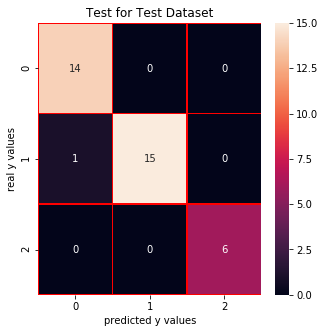

In [24]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

### Classification Report 

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

   micro avg       0.97      0.97      0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



### Accuracy Score 

In [26]:
print(accuracy_score(y_test,y_pred))

0.9722222222222222


# 5.Visualising the Prediction 

### Vizualizing training set results

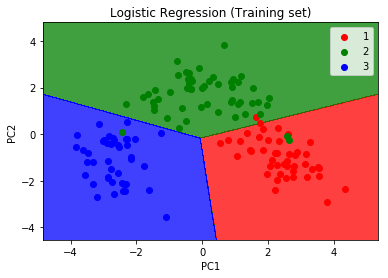

In [27]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Vizualization of test set results

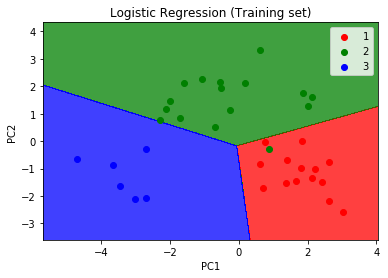

In [28]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# 6.Conclusion 

# TO BE CONTINUED 